## Table of Contents: Decision Tree - Loan Approval Prediction

Last Edited: October 4th, 2024

1. Uploading Dataset
2. Descriptive Analysis (`head()`, `columns`, `dtypes`, `info()`)
3. Data Cleaning (dropna)
4. Encoding Categorical Features (LabelEncoder)
5. Feature Selection and Target Definition
6. Train-Test Split (30% test)
7. Decision Tree Model Training
8. Model Evaluation: Accuracy Score
9. Confusion Matrix Visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

MessageError: Error: credential propagation was unsuccessful

In [ ]:
path = "/content/drive/MyDrive/Kellton Tech/Model Code/dataset/LoanDataset - LoansDatasest.csv"
df= pd.read_csv(path)
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


In [ ]:
df.isnull().sum()

,0
customer_id,3
customer_age,0
customer_income,0
home_ownership,0
employment_duration,895
loan_intent,0
loan_grade,0
loan_amnt,1
loan_int_rate,3116
term_years,0


In [ ]:
df_data = df.dropna()

In [ ]:
df_data.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT
5,6.0,21,9900,OWN,2.0,VENTURE,A,"£2,500.00",7.14,1,N,2,DEFAULT


In [ ]:
df_data.columns

Index(['customer_id', 'customer_age', 'customer_income', 'home_ownership',
       'employment_duration', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'term_years', 'historical_default', 'cred_hist_length',
       'Current_loan_status'],
      dtype='object')

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10421 entries, 0 to 32583
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          10421 non-null  float64
 1   customer_age         10421 non-null  int64  
 2   customer_income      10421 non-null  object 
 3   home_ownership       10421 non-null  object 
 4   employment_duration  10421 non-null  float64
 5   loan_intent          10421 non-null  object 
 6   loan_grade           10421 non-null  object 
 7   loan_amnt            10421 non-null  object 
 8   loan_int_rate        10421 non-null  float64
 9   term_years           10421 non-null  int64  
 10  historical_default   10421 non-null  object 
 11  cred_hist_length     10421 non-null  int64  
 12  Current_loan_status  10421 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 1.1+ MB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df_data['customer_income'] = df_data['customer_income'].str.replace(',', '').astype(float)

<ipython-input-30-0970544acdaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['customer_income'] = df_data['customer_income'].str.replace(',', '').astype(float)


In [ ]:
df_data['loan_amnt'] = df_data['loan_amnt'].replace('[\£,]', '', regex=True).astype(float)

<ipython-input-31-a86ca2f6ce66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['loan_amnt'] = df_data['loan_amnt'].replace('[\£,]', '', regex=True).astype(float)


In [ ]:
#print(X_train.dtypes)

In [ ]:
df_data.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000.0,RENT,123.0,PERSONAL,C,35000.0,16.02,10,Y,3,DEFAULT
2,3.0,25,9600.0,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5,N,3,DEFAULT
3,4.0,23,65500.0,RENT,4.0,MEDICAL,B,35000.0,15.23,10,N,2,DEFAULT
4,5.0,24,54400.0,RENT,8.0,MEDICAL,B,35000.0,14.27,10,Y,4,DEFAULT
5,6.0,21,9900.0,OWN,2.0,VENTURE,A,2500.0,7.14,1,N,2,DEFAULT


In [ ]:
X = df_data[['customer_age', 'customer_income', 'employment_duration',
              'loan_amnt', 'loan_int_rate',
            'term_years', 'cred_hist_length']]
y = df_data['Current_loan_status']

In [ ]:
X_train['customer_income'] = X_train['customer_income'].astype(str)
X_test['customer_income'] = X_test['customer_income'].astype(str)

In [ ]:
X_train['customer_income'] = X_train['customer_income'].str.replace('[\£,]', '', regex=True).astype(float)
X_test['customer_income'] = X_test['customer_income'].str.replace('[\£,]', '', regex=True).astype(float)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# (random_state=42) is this part repetitive?
decision = DecisionTreeClassifier(random_state=35)
decision.fit(X_train, y_train)

DecisionTreeClassifier(random_state=35)

In [ ]:
y_pred = decision.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("R-squared:", decision.score(X_train,y_train))


R-squared: 0.9998629010145325


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score:", accuracy_score(y_test, y_pred))

Accuracy score: 0.7304125359769748


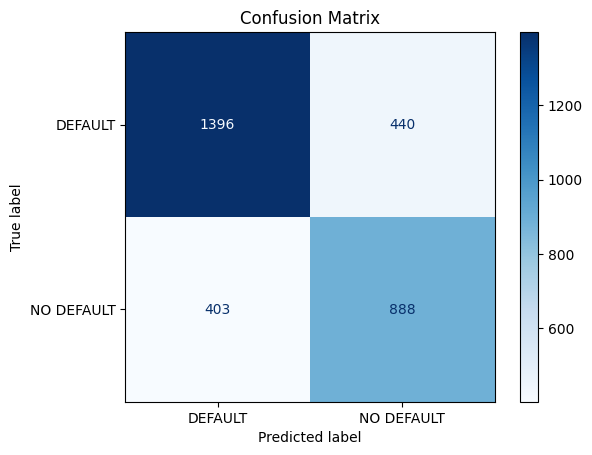

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred, labels=decision.classes_)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=decision.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()